# Data Wrangling with Spark

This is the code used in the previous screencast. Run each code cell to understand what the code does and how it works.

These first three cells import libraries, instantiate a SparkSession, and then read in the data set

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()

In [3]:
path = "data/sparkify_log_small.json"
sdf = spark.read.json(path)

# Data Exploration 

The next cells explore the data set.

In [4]:
sdf.limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1513648531284,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


In [5]:
sdf.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [7]:
sdf.describe().toPandas()

,summary,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,count,8347,10000,9664,9664,10000,9664,8347,10000,9664,10000,10000,9664,10000,8347,10000,10000,9664,10000
1,mean,461.0,None,None,None,19.6734,None,249.6486587492503,None,None,None,None,1.5046953695887393E12,4436.7511,Infinity,202.8984,1.5137859954164E12,None,1442.4413286423842
2,stddev,300.0,None,None,None,25.382114916132597,None,95.00437130781461,None,None,None,None,8.47314252131657E9,2043.1281541827557,NaN,18.041791154505876,3.2908288623601213E7,None,829.8909432082613
3,min,!!!,Guest,Aakash,F,0,Acevedo,1.12281,free,"Aberdeen, WA",GET,About,1463503881284,9,#1,200,1513720872284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10)...",
4,max,ÃÂlafur Arnalds,Logged Out,Zoie,M,163,Zuniga,1806.8371,paid,"Yuma, AZ",PUT,Upgrade,1513760702284,7144,wingless,404,1513848349284,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,999


In [8]:
sdf.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [9]:
sdf.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827557|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [10]:
sdf.count()

10000

In [11]:
sdf.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [13]:
sdf.select("userId", "firstname", "page", "song").where("userId = '1046'").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

# Calculating Statistics by Hour

In [14]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)

In [16]:
sdf = sdf.withColumn("hour", get_hour(sdf.ts))

In [19]:
sdf.limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046,22
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000,22
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219,22
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373,22
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1513648531284,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747,22


In [21]:
songs_in_hour = sdf.filter(sdf.page == "NextSong").groupby(sdf.hour).count().orderBy(sdf.hour.cast("float"))

In [22]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



In [23]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

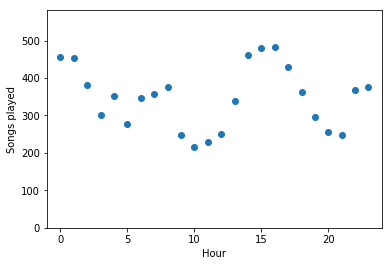

In [24]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

# Drop Rows with Missing Values

As you'll see, it turns out there are no missing values in the userID or session columns. But there are userID values that are empty strings.

In [25]:
user_log_valid = sdf.dropna(how = "any", subset = ["userId", "sessionId"])

In [26]:
user_log_valid.count()

10000

In [28]:
sdf.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [29]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [30]:
user_log_valid.count()

9664

# Users Downgrade Their Accounts

Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

In [32]:
user_log_valid.filter("page = 'Submit Downgrade'").toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
0,None,Logged In,Kelly,F,24,Newton,None,paid,"Houston-The Woodlands-Sugar Land, TX",PUT,Submit Downgrade,1513283366284,5931,None,307,1513768454284,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,1138,11


In [34]:
sdf.select(["userId", "firstname", "page", "level", "song"]).where(sdf.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [35]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [36]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [38]:
user_log_valid.limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour,downgraded
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046,22,0
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000,22,0
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219,22,0
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373,22,0
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1513648531284,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747,22,0


In [39]:
from pyspark.sql import Window

In [40]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [41]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [44]:
user_log_valid.select(
    ["userId", "firstname", "ts", "page", "level", "downgraded", "phase"]
).where("userId = '1138'").sort("ts").toPandas()

,userId,firstname,ts,page,level,downgraded,phase
0,1138,Kelly,1513729066284,Home,paid,0,1
1,1138,Kelly,1513729066284,NextSong,paid,0,1
2,1138,Kelly,1513729313284,NextSong,paid,0,1
3,1138,Kelly,1513729552284,NextSong,paid,0,1
4,1138,Kelly,1513729783284,NextSong,paid,0,1
5,1138,Kelly,1513730001284,NextSong,paid,0,1
6,1138,Kelly,1513730263284,NextSong,paid,0,1
7,1138,Kelly,1513730518284,NextSong,paid,0,1
8,1138,Kelly,1513730768284,NextSong,paid,0,1
9,1138,Kelly,1513731182284,NextSong,paid,0,1
